In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [3]:
input_dir = Path("../data")
output_dir = Path("../data_out")
image_output_dir = output_dir / "images"

image_output_dir.mkdir(exist_ok=True, parents=True)

In [4]:
concentration_full = np.load(input_dir / "synthetic_data/retardation_freundlich/c_train.npy")
concentration_full.shape

(2001, 2, 26)

In [5]:
Nt, _, Nx = concentration_full.shape 

x = np.linspace(0, 1, Nx)
t = np.linspace(0, 10000, Nt)

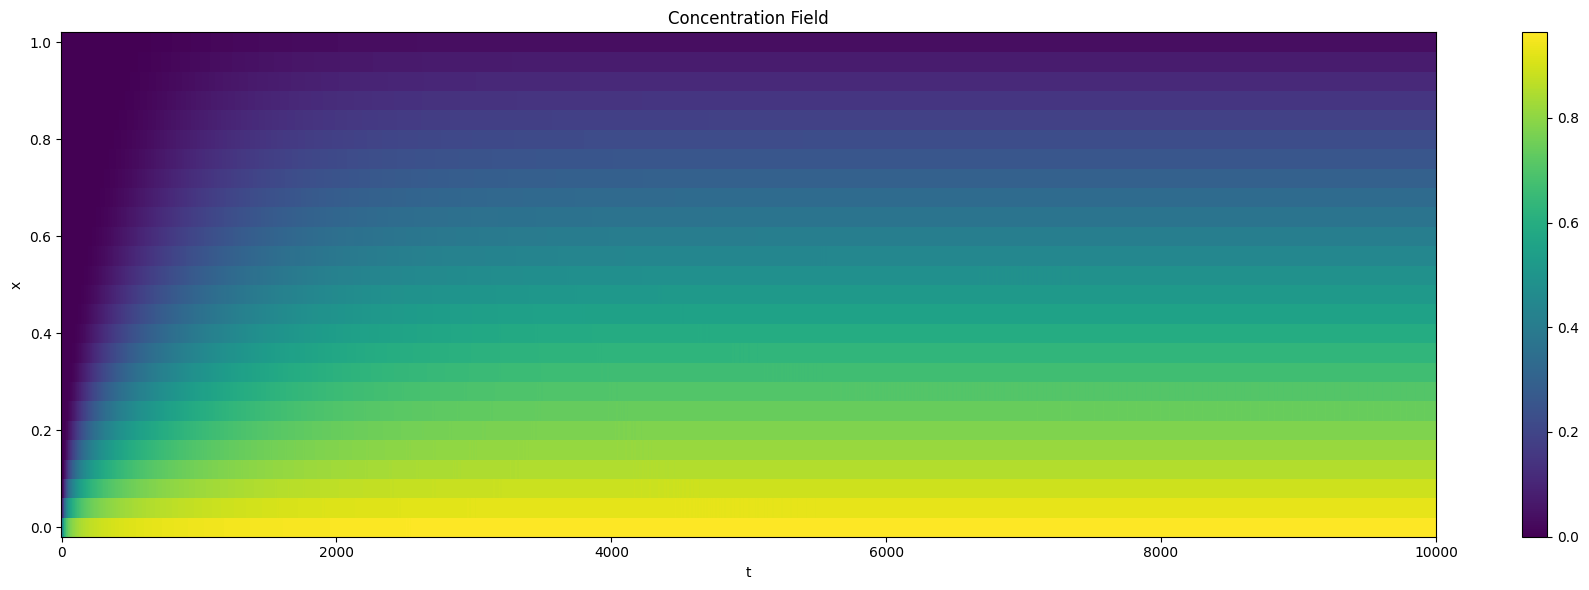

In [6]:
plt.figure(figsize=(18, 6))
plt.pcolor(t, x, concentration_full[:, 0, :].T)
plt.colorbar()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Concentration Field")
plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_full.png")
plt.show() 

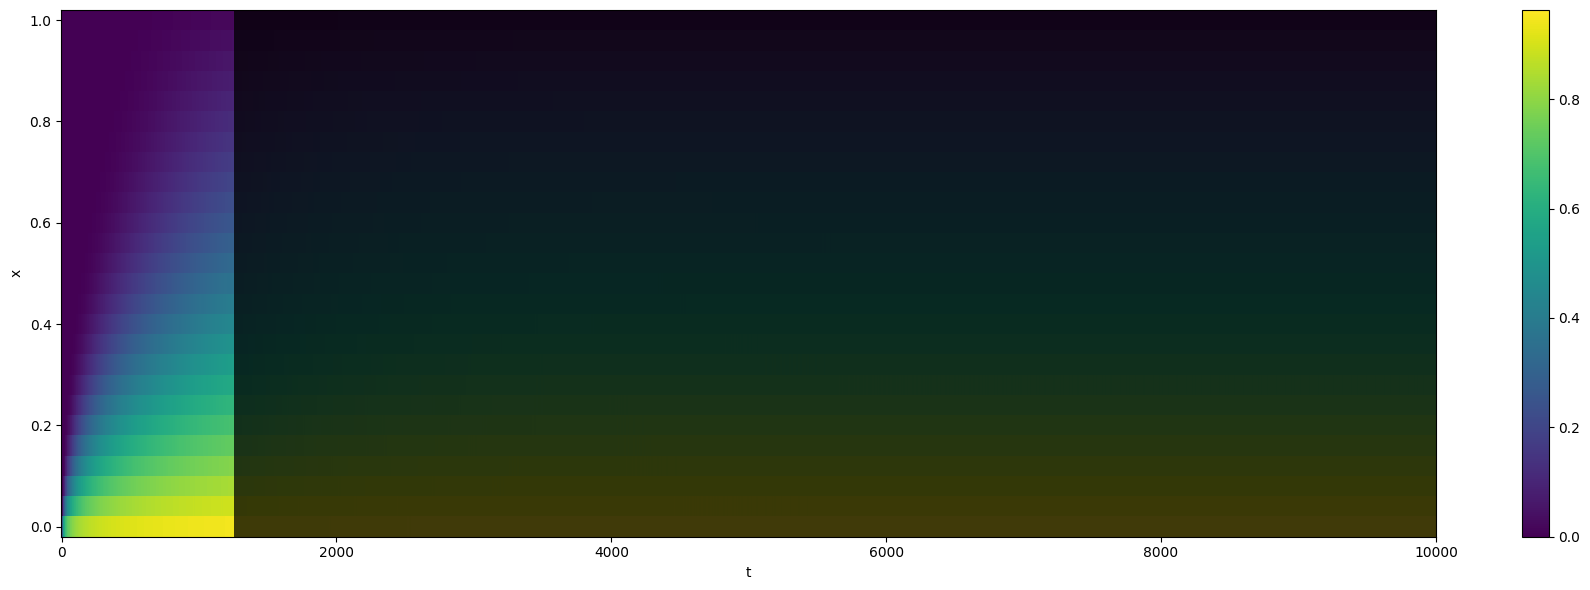

In [7]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0]), (1, [0, 0, 0, 0.75])])

fig, ax = plt.subplots(figsize=(18, 6))

grey_mask = np.zeros_like(concentration_full[:, 0, :].T)
grey_mask[:, 251:] = 1

plt.colorbar(ax.pcolormesh(t, x, concentration_full[:, 0, :].T, cmap="viridis"))
ax.pcolormesh(t, x, grey_mask, cmap=cmap)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_full_black_test.png")
plt.show()

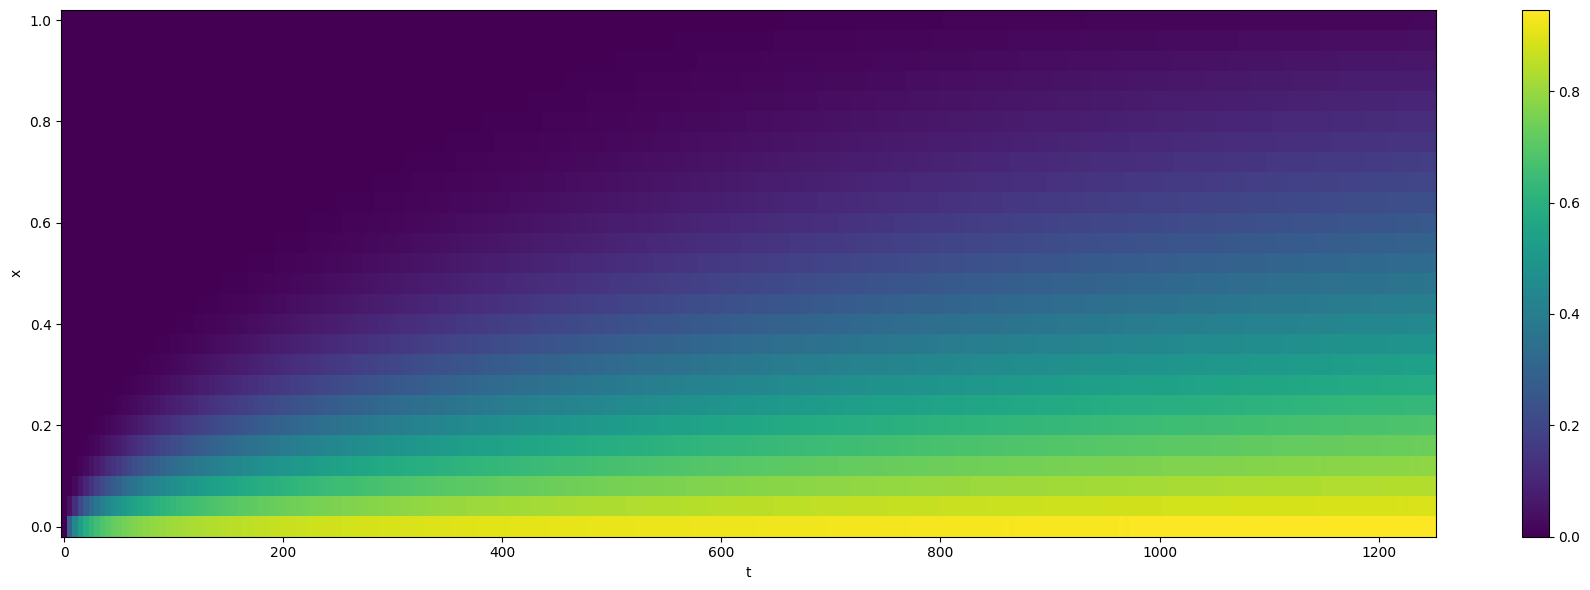

In [8]:
fig, ax = plt.subplots(figsize=(18, 6))

c_train = concentration_full[:251, 0, :]
t_train = t[:251]

plt.colorbar(ax.pcolormesh(t_train, x, c_train.T, cmap="viridis"))
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_train.png")
plt.show()

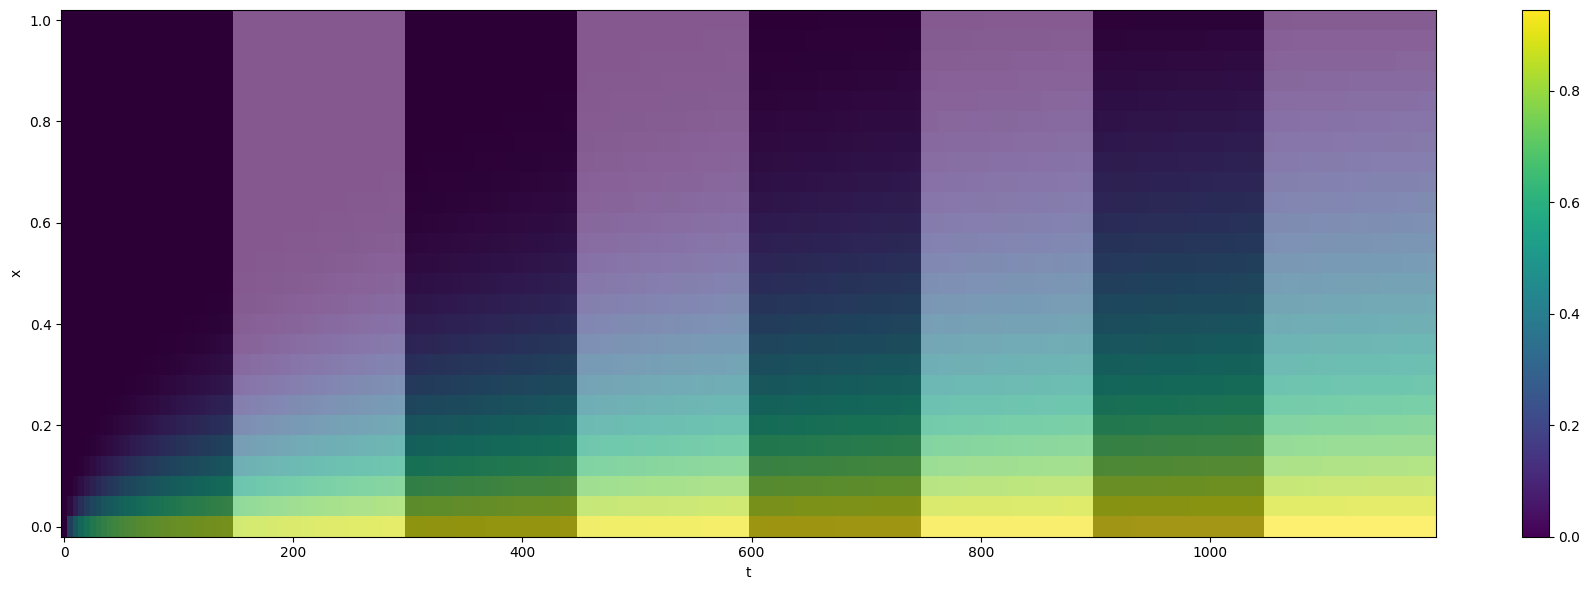

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))

grey_mask = np.zeros_like(c_train.T)
interval_size = 30
k = 0
iteration = 0
while k+interval_size < grey_mask.shape[1]: 
    grey_mask[:, k:k+interval_size] = 1 if iteration % 2 == 0 else 0
    iteration += 1
    k += interval_size

plt.colorbar(ax.pcolormesh(t_train[:k], x, c_train[:k].T, cmap="viridis"))
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.35]), (1, [0, 0, 0, 0.35])])
ax.pcolormesh(t_train[:k], x, grey_mask[:, :k], cmap=cmap)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_train_intervals.png")
plt.show()

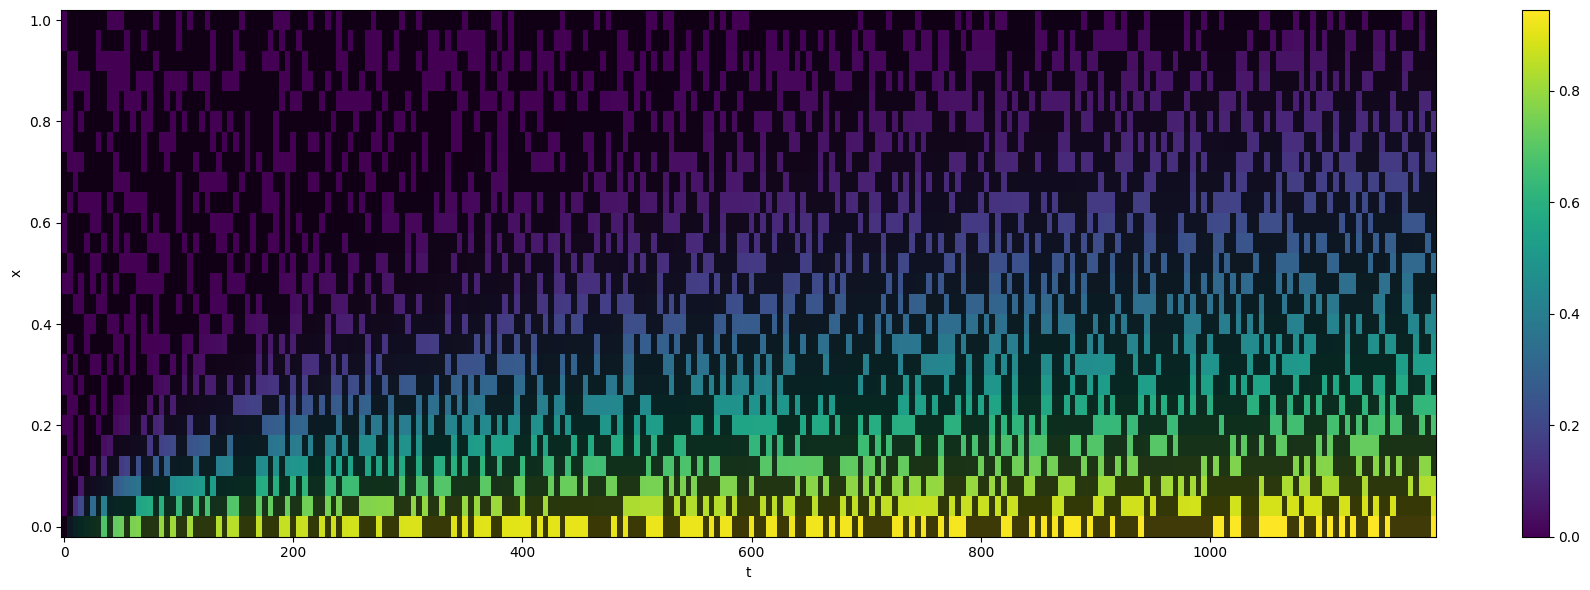

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))

grey_mask = np.random.choice([0, 1], size=c_train.T.shape, p=[0.4, 0.6])

plt.colorbar(ax.pcolormesh(t_train[:k], x, c_train[:k].T, cmap="viridis"))
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.0]), (1, [0, 0, 0, 0.75])])
ax.pcolormesh(t_train[:k], x, grey_mask[:, :k], cmap=cmap)
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_train_random_subset.png")
plt.show()

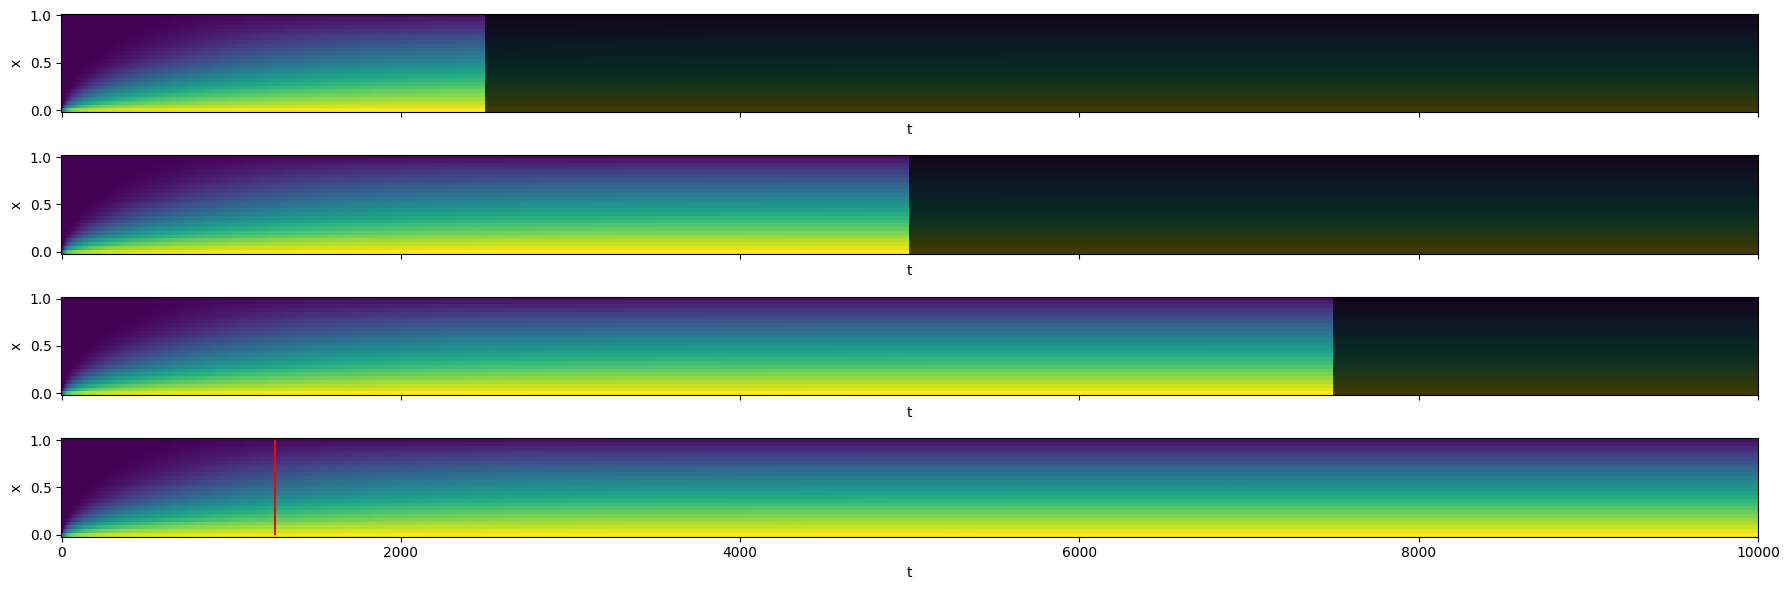

In [11]:
nrows = 4
fig, axs = plt.subplots(nrows=nrows, figsize=(18, 6), sharex=True)

cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.0]), (1, [0, 0, 0, 0.75])])

c0_full = concentration_full[:, 0, :]

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 1*len(c0_full)//nrows:] = 1
axs[0].pcolormesh(t, x, c0_full.T, cmap="viridis")
axs[0].pcolormesh(t, x, grey_mask, cmap=cmap)
axs[0].set_xlabel("t")
axs[0].set_ylabel("x")

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 2*len(c0_full)//nrows:] = 1
axs[1].pcolormesh(t, x, c0_full.T, cmap="viridis")
axs[1].pcolormesh(t, x, grey_mask, cmap=cmap)
axs[1].set_xlabel("t")
axs[1].set_ylabel("x")

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 3*len(c0_full)//nrows:] = 1
axs[2].pcolormesh(t, x, c0_full.T, cmap="viridis")
axs[2].pcolormesh(t, x, grey_mask, cmap=cmap)
axs[2].set_xlabel("t")
axs[2].set_ylabel("x")

grey_mask = np.zeros_like(c0_full.T)
# grey_mask[:, 4*len(c0_full)//nrows] = 1
axs[3].pcolormesh(t, x, c0_full.T, cmap="viridis")
axs[3].pcolormesh(t, x, grey_mask, cmap=cmap)
axs[3].set_xlabel("t")
axs[3].set_ylabel("x")

axs[-1].vlines(t[251], 0, x[-1], color="r")

plt.tight_layout()
plt.savefig(image_output_dir / "c_diss_field_train_increasing_intervals.png")
plt.show()

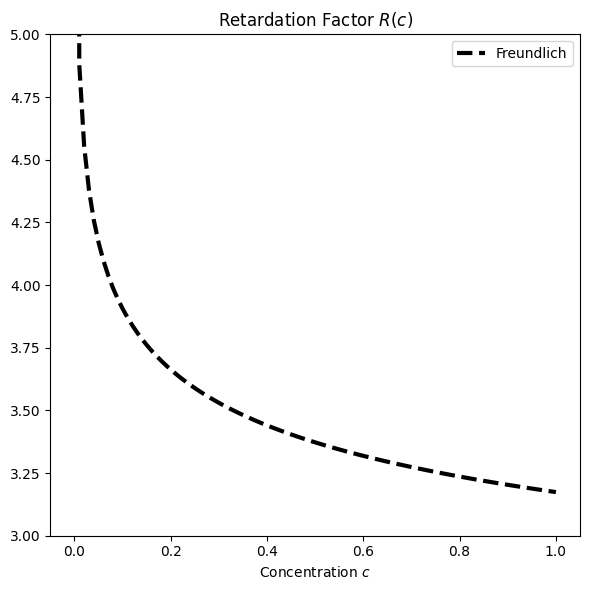

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

u_ret = np.load(output_dir / "default_finn/u_ret.npy")
ax.plot(u_ret, np.load(output_dir / "default_finn/retardation_freundlich.npy"), "k--", linewidth=3, label="Freundlich")
ax.set_title("Retardation Factor $R(c)$")
ax.set_xlabel("Concentration $c$")
ax.set_ylim(3, 5)
ax.legend()
plt.tight_layout()
fig.savefig(image_output_dir / "freundlich.png")
plt.show()

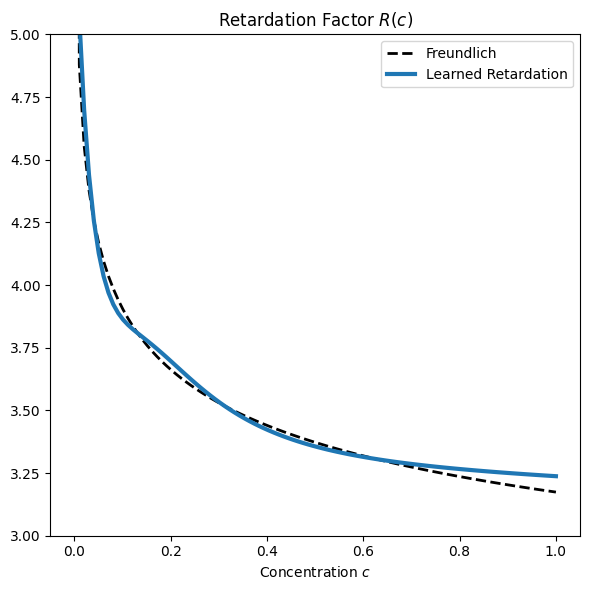

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(u_ret, np.load(output_dir / "default_finn/retardation_freundlich.npy"), "k--", linewidth=2, label="Freundlich")
ax.plot(u_ret, np.load(output_dir / "default_finn/predicted_retardations/retPred_100.npy"), "-", linewidth=3, label="Learned Retardation")
ax.set_title("Retardation Factor $R(c)$")
ax.set_xlabel("Concentration $c$")
ax.set_ylim(3, 5)
ax.legend()
plt.tight_layout()
fig.savefig(image_output_dir / "learned_retardation.png")
plt.show()

# 3PINN on C

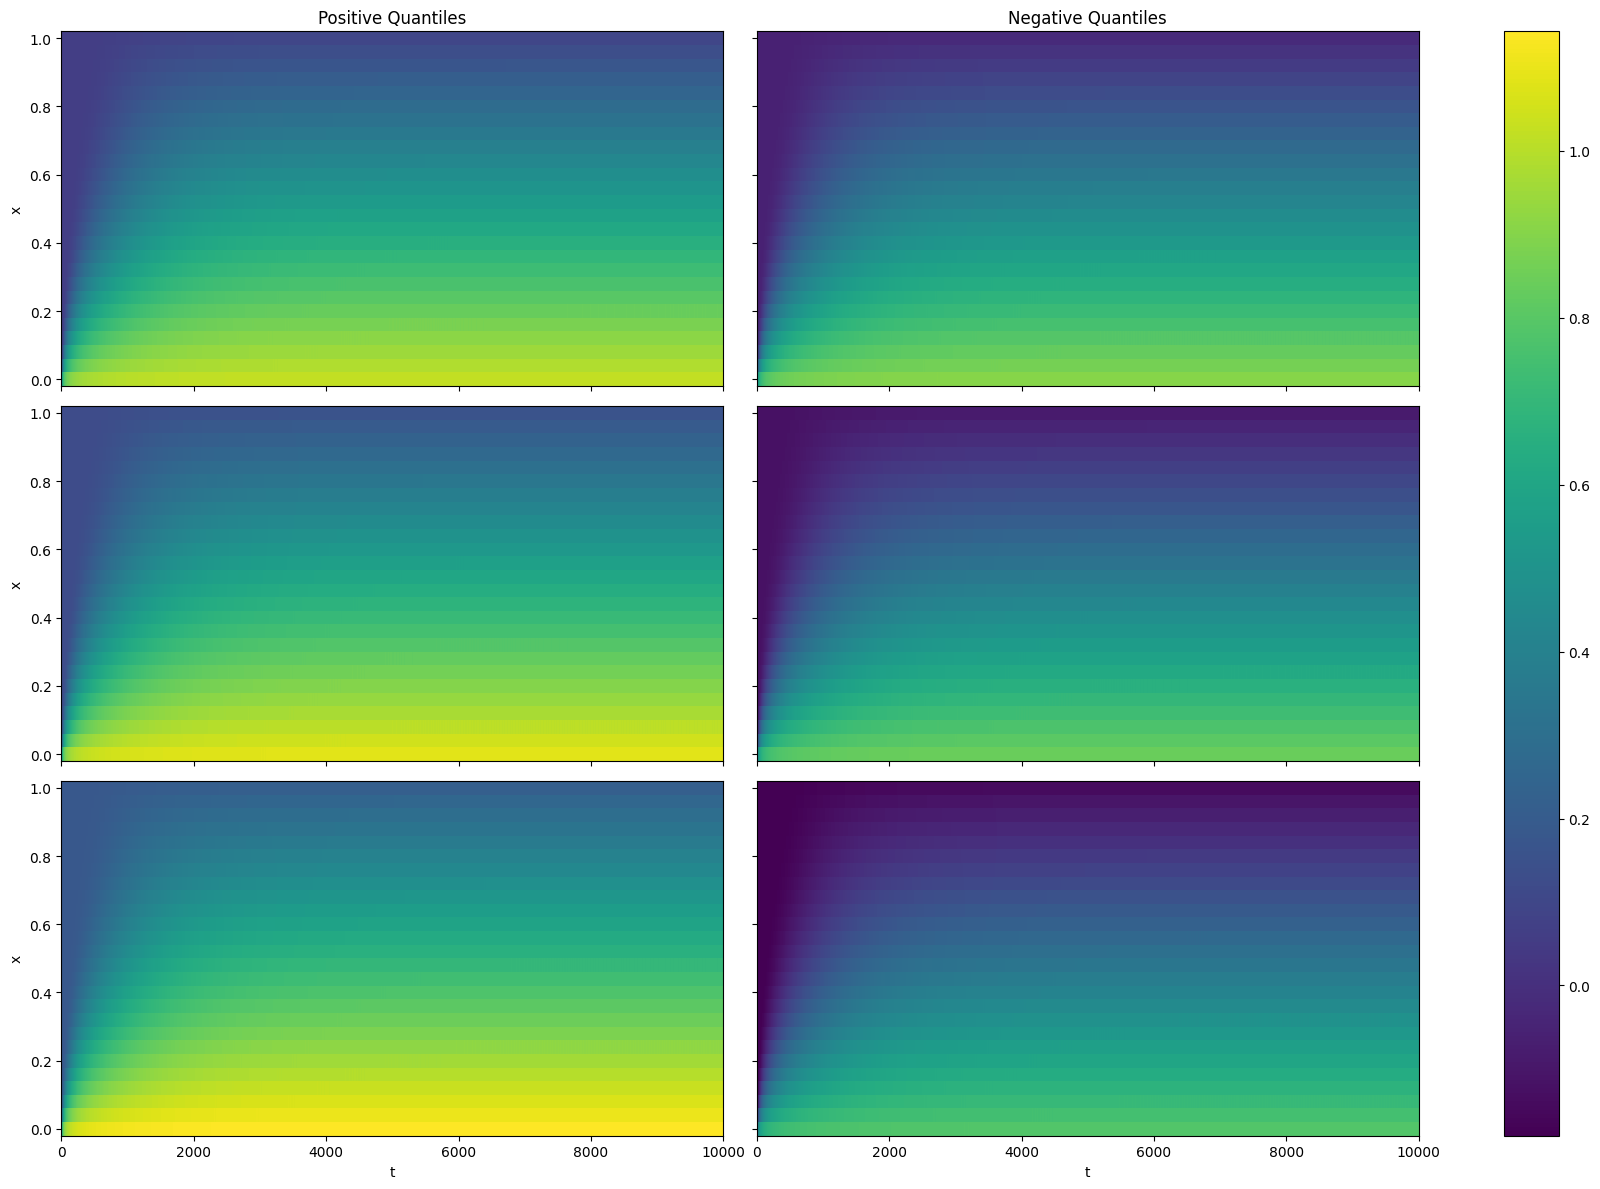

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12), sharex=True, sharey=True)

all_pcolors = []


fac = 0.3
vmin = np.min(concentration_full[:, 0, :] - 0.6*fac)
vmax = np.max(concentration_full[:, 0, :] + 0.6*fac)

# pos quantiles
all_pcolors.append(axs[0, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.2*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[1, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.4*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[2, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.6*fac, cmap="viridis", vmin=vmin, vmax=vmax))

# neg quantiles
all_pcolors.append(axs[0, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.2*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[1, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.4*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[2, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.6*fac, cmap="viridis", vmin=vmin, vmax=vmax))

axs[0,0].set_title("Positive Quantiles")
axs[0,1].set_title("Negative Quantiles")
axs[2,0].set_xlabel("t")
axs[2,1].set_xlabel("t")
axs[0,0].set_ylabel("x")
axs[1,0].set_ylabel("x")
axs[2,0].set_ylabel("x")

# Create a colorbar for all pcolormesh plots.
plt.tight_layout()
fig.colorbar(all_pcolors[0], ax=axs, orientation='vertical')#, fraction=0.025, pad=0.04)
fig.savefig(image_output_dir / "c_quantiles.png")

plt.show()